# Pre-Run Setup

### Import Libraries

In [1]:
from qiskit import *
import os
import datetime
import numpy as np
from datetime import date
#you have to load some account to start

IBMQ.save_account('bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7')
if(not IBMQ.active_account()):
    IBMQ.load_account()

configrc.store_credentials:WARNING:2020-09-08 20:11:31,103: Credentials already present. Set overwrite=True to overwrite.


### Specify the files that need to be run 
The old setup works with only one folder.

In [13]:
import glob
from datetime import date
circuitPath = r"../Circuits/"
device = "ibmq_armonk"
today = date.today()
#datestr = today.strftime("%d%m%Y")
datestr = '08092020'
runname = 'stateTomo_freeEvo'

qasmpath = circuitPath + device + '/' + datestr + '/' + runname +'/'
qasmlist = glob.glob(qasmpath + 'stateTomo*.qasm')
# sort by id gates
qasmlist.sort(key=lambda x: int(x.split('/')[-1].split('_')[5].split('=')[-1]))
print(len(qasmlist))
for i in range(6):
    f=qasmlist[0]
    print(f)
    QuantumCircuit().from_qasm_file(f).draw(output='mpl')

327
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=0_XplusState_obsZ.qasm


../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/stateTomo_freeEvo_08092020_ibmq_armonk_numIdGates=12_XplusState_obsZ.qasm


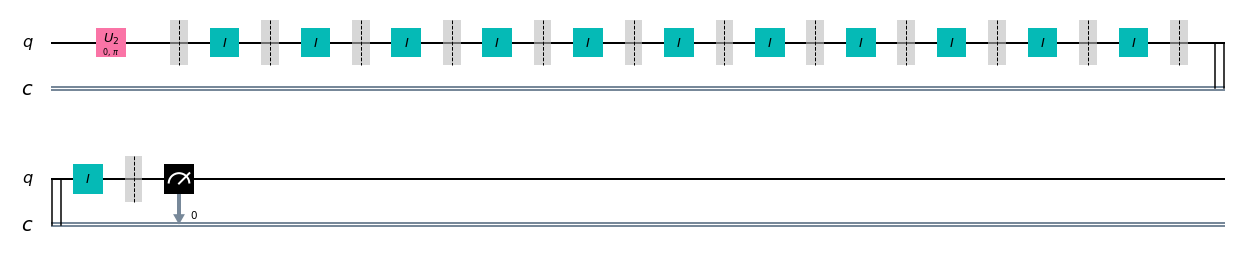

In [19]:
f=qasmlist[5]
print(f)
QuantumCircuit().from_qasm_file(f).draw(output='mpl')

### randomize time

In [21]:
def get_time(filename):
    idgate = filename.split('/')[-1].split('_')[5].split('=')[-1]
    return idgate
print(get_time(qasmlist[0]))
times = list(set([get_time(x) for x in qasmlist])) #remove duplicates
times.sort()
print(times)

0
['0', '1008', '1032', '1056', '108', '1080', '1104', '1128', '1152', '1176', '12', '120', '1200', '1224', '1248', '1272', '1296', '132', '1320', '1344', '1368', '1392', '1416', '144', '1440', '1464', '1488', '1512', '1536', '156', '1560', '1584', '1608', '1632', '1656', '168', '1680', '1704', '1728', '1752', '1776', '180', '1800', '1824', '1848', '1872', '1896', '192', '1920', '1944', '1968', '1992', '2016', '204', '2040', '216', '228', '24', '240', '252', '264', '276', '288', '300', '312', '324', '336', '348', '36', '360', '372', '384', '396', '408', '420', '432', '444', '456', '468', '48', '480', '492', '504', '516', '528', '540', '552', '564', '60', '600', '624', '648', '672', '696', '72', '720', '744', '768', '792', '816', '84', '840', '864', '888', '912', '936', '96', '960', '984']


In [22]:
import random
random.shuffle(times) #randomize the timesteps
print(times)

['1416', '528', '300', '48', '1080', '912', '816', '492', '1584', '840', '1392', '744', '24', '84', '60', '372', '108', '1512', '1368', '1248', '1680', '480', '672', '1224', '1872', '348', '264', '1536', '120', '648', '168', '1296', '1056', '1920', '1992', '720', '384', '324', '1776', '696', '1704', '960', '144', '1488', '1176', '600', '1032', '1728', '1344', '2016', '1656', '1944', '228', '1848', '1608', '408', '888', '360', '444', '1440', '336', '1800', '864', '1752', '420', '768', '156', '216', '276', '1272', '180', '540', '252', '96', '1008', '1968', '1464', '36', '12', '792', '0', '1896', '564', '1200', '456', '624', '504', '312', '984', '132', '432', '72', '516', '1320', '1128', '1560', '288', '468', '1152', '192', '1824', '1104', '552', '936', '2040', '240', '396', '1632', '204']


In [23]:
sorted_qasm_list = []
for time in times:
    sorted_qasm_list += [f for f in qasmlist if get_time(f) == time]

### add measurement mitigation circuits

In [26]:
meas_qasmlist = glob.glob(qasmpath + 'MeasError*.qasm')
print(len(meas_qasmlist))

2


In [27]:
sorted_qasm_list = meas_qasmlist + sorted_qasm_list

In [28]:
tokens = {'haimeng@usc.edu':'bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7',
          'zhanghaimeng1994@gmail.com':'fa1d1dd820b8c41dca1f520f87d61fd0ac47781d41c29bd51a7073f50e45035c2d98dfd5c8c760b9986bf165e6f4a086525a150f409855aa1d63a7ee92ca1172',
          'theireasychair@gmail.com':'cacd020d84df513852c6f59d4648e7f1e4e4d9c29f032306c60ab23dccf0d225d4c1fa6857c51a0c792e07b2a96d358e6494a23e7db64f20ece90b6eb06f5c85',
          'theireasychair@icloud.com':'7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13',
          'jinweixu@stanford.edu':'6dbc2e530007ad4fcd44abccf232873db3589341cd9d728219c4c97ccc489be727ca3f46412e10a0292f124e895c0e5623471bb1d5c3f54b4eb3bdc9d90e5338'}

### Specify API and Backend

This script checks for how many jobs are available per token.

In [20]:
tokensB = { 
'bbk.pokharel@gmail.com' :  '4c7ba9466e8d1bafc095fbc136f3e59b14e23457ae0883ca7e235347842acfe88ef14342aa83703f8a2def58b54dc0f1b7f963232f88248e6dc547c5e8ca3a65' ,
'pokharel@usc.edu' : '21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
'Matt 1' : '66a15e358a104a2680592d38599216911e752e373dec894b0f7196d80982e4ed14fd8337d9f10b49f1f4b98bcc7c651b2f2c150726914a3984214097fe70eb94',
'Matt 2' : 'a4a855f0dd4e7f3d025718c244e182c9f9aa20d62579ac7b565e371fa36409a5c49ec64e18aa1c54e822e4a714a94a1751998121e068b569b5898c18b7f87f4f',
    'Matt 3' : '0259e75023ad771da659fe35ccb6efa1c3f179511f31bca63701c4bffe40c2d856ccc092b01bf4d45cf179a10175c45143709cdcf59bdca5b8a3e2e14f3bf6af',
    'Vinay 1': '31c2289f9d24c098baf2ba21c4534a0811dffaa2c3d350dad246528e0a3f10509253a7047a24e1eaa27fc71ef98954ec7adbbedece7fc422855abcd53a730049',
    'Vinay 2' : 'be376bd6ecef35c8a887c42528263491dca319feee414e09929b3e60637e529a88d049aef61b835c811f362d21378885afb6b4d3af42c04033b2d6d243c03105',
    'Vinay 3': '7540e0d1fe55966d0034885ad3b21c25793ae3e66fe71d143803a0db20cc7941fc5d128bba8bbafa5bf59fae83932c0691972aa901141071449d73e50127d59a',
    'hiyanthi.peiris' : 'e993081e329ba581be46af6c2c739bfdc1c0fbca06081519157f238f8dbb636bfa783adfcbdc141fcd6bc03ed9e675b35d90cc34e8f81b19e3f04066d916e8af',
    'peiris.pokharel' : '56e4e455625f6ad859b235b3821c1cc145124e0b66aaed5d07d07d27856ebe8a76e3f36128dad5c6eae8ad77babac60932cbb8b328c9c95138e70ac69711cc36'
}

In [29]:
#write the email address corresponding to each API, this will help when these APIs expire
apiDict = tokens
apiInv =dict(map(reversed, apiDict.items()))
apitokens = list(apiDict.values())


for token in apitokens:
    IBMQ.disable_account() #Start with no account loaded
    provider = IBMQ.enable_account(token) #Some account must be loaded before we start
    backend = provider.backends.ibmq_armonk
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    print(f"{available_jobs} jobs available for {apiInv[token]}")



5 jobs available for haimeng@usc.edu
5 jobs available for zhanghaimeng1994@gmail.com
5 jobs available for theireasychair@gmail.com
5 jobs available for theireasychair@icloud.com
5 jobs available for jinweixu@stanford.edu


In [30]:
backend.configuration() #max_experiments=75, max_shots=8192
max_experiments=backend.configuration().max_experiments
max_shots=backend.configuration().max_shots
print(max_experiments,max_shots)

75 8192


### Chunk the files into Batches

In [31]:
#We need to chunk the files, so that each usertoken,jobtoken is linked to batch of circuits

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
batchFiles = list(chunks(sorted_qasm_list, 45))
len(batchFiles)
#number of jobs required to complete

8

# Run the circuits

### Function to import backend and token information during the runs

In [32]:
runRecords = '../Data/records/info/' #information about each job is stored in this folder

if not os.path.exists(os.path.dirname(runRecords)):
    os.makedirs(os.path.dirname(runRecords))
    
def getProp(paramList):
    return ','.join([str(x['value']) for x in paramList])


def exportJobInfo(usertoken, jobid, filenames, backend):
    global runRecords
    now = datetime.datetime.now()
    f= open(f"{runRecords}{jobid}_{usertoken}.txt","w+")
    f.write("TOKEN\n")
    f.write("usertoken,jobid\n")
    f.write(f"{usertoken},{jobid}\n")
    
    backend_info = backend.properties().to_dict() 
    f.write(f"BACKEND \n{backend_info['backend_name']}\n")
    f.write(backend_info['backend_version'] + '\n')
    f.write(backend_info['last_update_date'] + '\n' )
    
    
    f.write("GATES\n")
#     print(backend_info['qubits'])
    #get the name of all the gate parameters and the units for these parameters
    f.write('name,' + ','.join([f"{x['name']}_in_{x['unit']}" for x in backend_info['gates'][0]['parameters'] ]) + '\n')
    
    #now print them for each gate for the backend, this includes both 1 and 2 qubit gates
    for gate in backend_info['gates']:
        f.write(f"{gate['name']},{getProp(gate['parameters'])}"  + '\n')
    
    f.write("QUBITS\n")
    #get the name of all the gate parameters and the units for these parameters
    f.write('number,' + ','.join([f"{x['name']}_in_{x['unit']}" for x in backend_info['qubits'][0]]) + '\n')
    for q in range(0, len(backend_info['qubits'])):
        qubitProps = backend_info['qubits'][q]
        f.write(f"{q}, {getProp(qubitProps)}"  + '\n')

    f.write("CIRCUITS\n")
    for fname in filenames:
        f.write(f"{fname}\n")
    f.close()
    return None

#test
#exportJobInfo('a', 'c', batchFiles[0], backend)

### Function to check for available tokens

In [33]:

 
#Select a available token to send the run to
#With the current setup, loading and unloading a token takes sometime
#sequentially check each token for availability will increase loadtime for tokens that are near the end
#so given a list of tokens, everytime a job is sent to a token, that token will be sent to the end
def availableToken():
    global provider, backend, apitokens
    token = apitokens[0]
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    if available_jobs > 0:
        print(f'{available_jobs} jobs available for {apiInv[token]}')
        return token

    #if the first token has no availability then we will continue below
    apitokens.append(apitokens.pop(0))
    for token in apitokens:
        IBMQ.disable_account() 
        provider = IBMQ.enable_account(token) 
        backend = provider.backends.ibmq_armonk
        available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
        if available_jobs > 0:
            print(f'{available_jobs} jobs available for {apiInv[token]}')
            apitokens.insert(0, apitokens.pop(apitokens.index(token)))
            return token

availableToken()   
      

5 jobs available for haimeng@usc.edu


'bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7'

### Actually doing the runs

In [34]:
#start with empty containers
#dont run this block if you already have a list of runs you want to continue

runDict = {} #matches each batch to the job token
jobDict = {} #matches each batch to the entire job object
jobsFound = set([]) #status is updated when checked
jobsDone = set([])

In [11]:
apiDict = { 
'bbk.pokharel@gmail.com' :  '4c7ba9466e8d1bafc095fbc136f3e59b14e23457ae0883ca7e235347842acfe88ef14342aa83703f8a2def58b54dc0f1b7f963232f88248e6dc547c5e8ca3a65' ,
'pokharel@usc.edu' : '21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
'Matt 1' : '66a15e358a104a2680592d38599216911e752e373dec894b0f7196d80982e4ed14fd8337d9f10b49f1f4b98bcc7c651b2f2c150726914a3984214097fe70eb94',
'Matt 2' : 'a4a855f0dd4e7f3d025718c244e182c9f9aa20d62579ac7b565e371fa36409a5c49ec64e18aa1c54e822e4a714a94a1751998121e068b569b5898c18b7f87f4f',
    'Matt 3' : '0259e75023ad771da659fe35ccb6efa1c3f179511f31bca63701c4bffe40c2d856ccc092b01bf4d45cf179a10175c45143709cdcf59bdca5b8a3e2e14f3bf6af',
    'Vinay 1': '31c2289f9d24c098baf2ba21c4534a0811dffaa2c3d350dad246528e0a3f10509253a7047a24e1eaa27fc71ef98954ec7adbbedece7fc422855abcd53a730049',
    'Vinay 2' : 'be376bd6ecef35c8a887c42528263491dca319feee414e09929b3e60637e529a88d049aef61b835c811f362d21378885afb6b4d3af42c04033b2d6d243c03105',
    'Vinay 3': '7540e0d1fe55966d0034885ad3b21c25793ae3e66fe71d143803a0db20cc7941fc5d128bba8bbafa5bf59fae83932c0691972aa901141071449d73e50127d59a',
    'hiyanthi.peiris' : 'e993081e329ba581be46af6c2c739bfdc1c0fbca06081519157f238f8dbb636bfa783adfcbdc141fcd6bc03ed9e675b35d90cc34e8f81b19e3f04066d916e8af',
    'peiris.pokharel' : '56e4e455625f6ad859b235b3821c1cc145124e0b66aaed5d07d07d27856ebe8a76e3f36128dad5c6eae8ad77babac60932cbb8b328c9c95138e70ac69711cc36'
}

In [35]:
#start runs
#generally we want to run all the batchFiles, but we can also choose to run only some of them:
#todoFiles = [batchFiles[3]]
jobsNotFound = list(set(range(0, len(batchFiles))) - jobsFound)

# todoFiles = batchFiles[0::]
# for runFiles in todoFiles:
for n in jobsNotFound[0::]:
    try:
        runFiles = batchFiles[n]
        token = availableToken()

        allQasmList = [QuantumCircuit.from_qasm_file(file) for file in runFiles] #this needs to edited if the batch files also contain directory
        allCircuits= assemble(allQasmList, backend, shots=8192)

        job_current = backend.run(allCircuits)
        print(job_current.status())

        runId = job_current.job_id()
    #     runTokens.append(token)
    #     runIds.append(runId)
        runDict[batchFiles.index(runFiles)] = [token, runId] #note that the index still refers to the original batchFiles

        #as retrieve job is not working temporarily I will save job_current in a dictionary as well
        jobDict[batchFiles.index(runFiles)] = job_current
        print(f"Batch {batchFiles.index(runFiles)} has been sent")

        exportJobInfo(token, runId, batchFiles[0], backend)
    except:
        pass

print(runDict)

5 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 0 has been sent
4 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 1 has been sent
3 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 2 has been sent
2 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 3 has been sent
1 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 4 has been sent
5 jobs available for zhanghaimeng1994@gmail.com
JobStatus.VALIDATING
Batch 5 has been sent
4 jobs available for zhanghaimeng1994@gmail.com
JobStatus.VALIDATING
Batch 6 has been sent
3 jobs available for zhanghaimeng1994@gmail.com
JobStatus.VALIDATING
Batch 7 has been sent
{0: ['bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7', '5f584b516b0348001a9a1e05'], 1: ['bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7', '5f584b61c7ba640019b21ca3

### Checking job status

In [43]:
# import sleep
jobsNotDone = list(set(runDict.keys()) - jobsDone)

def loadToken(token):
    global provider, backend
    if(not IBMQ.active_account()):
        IBMQ.load_account()
    IBMQ.disable_account() 
    provider = IBMQ.enable_account(token) 
    backend = provider.backends.ibmq_armonk
    return None

print("|Batch| Q#  | Status")
for job in jobsNotDone:
    try:
        [token, job_id] = runDict[job]
        loadToken(token)
        
        #get job from dictionary instead of retrieve job as that function is broken for now
#         job_data = backend.retrieve_job(job_id)
        #alternatively get job from the jobDict
        if job in jobDict:
            job_data = jobDict[job]
        else:
            job_data = backend.retrieve_job(job_id)
        #print(f"Batch {job} is {job_data.status()}")

        jobsFound.add(job)
        qno = '---'
        if str(job_data.status()) == 'JobStatus.QUEUED':
            #print(f'queue number is {job_data.queue_info().position}')
            qno = str(job_data.queue_info().position).zfill(3)

        if str(job_data.status()) == 'JobStatus.DONE':
            jobsDone.add(job)
            
        st = str(job_data.status()).split('.')[1]
        jno = str(job).zfill(3)
        print(f'| {jno} | {qno} | {st}')
    except:
        pass

print(f'{len(jobsFound)} jobs found: {jobsFound}')
print(f'{len(jobsDone)} jobs done: {jobsDone}')
# if some batches are showing network errors, run only those batches again
# try, excess commands above force the loop to continue even when some batches show errors

|Batch| Q#  | Status
| 006 | --- | DONE
| 007 | --- | DONE
8 jobs found: {0, 1, 2, 3, 4, 5, 6, 7}
8 jobs done: {0, 1, 2, 3, 4, 5, 6, 7}


# Exporting Data (Run after jobs have completed)

In [44]:
filename = batchFiles[0][0]
print(filename)
print(os.path.dirname(filename))
run = 1
os.path.dirname(filename).replace('/Circuits/', '/Data/raw/') + f'/run{run}/' + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'


../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo/MeasError_Mitigate_08092020_ibmq_armonk_ZminusState_obsZ.qasm
../Circuits/ibmq_armonk/08092020/stateTomo_freeEvo


'../Data/raw/ibmq_armonk/08092020/stateTomo_freeEvo/run1/MeasError_Mitigate_08092020_ibmq_armonk_ZminusState_obsZ_5f584bb9c7ba640019b21caf.txt'

In [45]:
resultRecords = '../Data/records/results/'
if not os.path.exists(resultRecords):
        os.makedirs(resultRecords)

#job results are returned a list of dictionaries and they will have the same order as the order of the files in that batch
# filenames given here should also include the folder names as well
def exportBatchJob(filenames, token, job_id):
    loadToken(token)
    #job_data = backend.retrieve_job(job_id)
    if job in jobDict:
        job_data = jobDict[job]
        print('found token')
    else:
        job_data = backend.retrieve_job(job_id)
    
    with open(resultRecords + f'{job_id}_{token}_results.txt', 'w') as f:
        f.write(str(job_data.result().to_dict()))
    
    for i in range(0, len(filenames)):
        result = job_data.result().get_counts()[i]
        exportResult(token, job_id, i, filenames[i], result)
        
        
#results will be in the form of dictionary
#filename here should also include the foldernames
def exportResult(token, job_id, circNo, filename, result):
#     print(filename)
    directory = os.path.dirname(filename).replace('/Circuits/', '/Data/raw/') + f'/run{run}/'
    file = directory + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'
    if not os.path.exists(os.path.dirname(file)):
        os.makedirs(os.path.dirname(file))
        
    
    with open(file, 'w') as f:
            f.write("usertoken,jobid,circuit_number\n")
            f.write(f"{token},{job_id},{circNo}\n")
            [f.write( '"'+str(key)+'"' + ',' + str(value) + '\n') for key, value in result.items()]
    return None




In [46]:
# batchFilesFull = [ [ inputDir + f for f in batch] for batch in batchFiles] #this wont be necessary if the filename have dir
for job in list(runDict.keys()):
    if job in jobsDone:
        [token, job_id] = runDict[job]
    #     print(runDict[job])
        exportBatchJob(batchFiles[job], token, job_id)
        print(f"job {job} has been exported")

found token
job 0 has been exported
found token
job 1 has been exported
found token
job 2 has been exported
found token
job 3 has been exported
found token
job 4 has been exported
found token
job 5 has been exported
found token
job 6 has been exported
found token
job 7 has been exported


In [ ]:
len(jobsDone)